In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_0mm = pd.read_csv("run248-0mm-cdr3-clones-IgG4-IGH_HUMAN-after-reassignment.csv", sep="\t")
df_0mm["Analysis"] = "0mm"
df_0mm.head()

,Sample,MID,cdr3pep,freq,uniq_umis,V_sub,J_sub,sum_sites,avg_sites,read_perc,umi_perc,Analysis
0,run248-r1-0855233-t0-full_S22,TGGACCTTAC,CARGRTMDVWGQGTTVT,118,1,IGHV3-7,IGHJ6,3,0.025424,1.433256,0.01941,0mm
1,run248-r1-0855233-t0-full_S22,TGGACCTTAC,CSKDLYSSGWYNYFDPWGQGTLVT,88,1,IGHV3-30,IGHJ5,2,0.022727,1.068869,0.01941,0mm
2,run248-r1-0855233-t0-full_S22,TGGACCTTAC,CGRHFSGRNWFDPWGQGIPVT,47,1,IGHV4-39,IGHJ5,1,0.021277,0.570873,0.01941,0mm
3,run248-r1-0855233-t0-full_S22,TGGACCTTAC,CARDNNGWYEASSKYFYGLDVWGQGTTVT,32,1,IGHV3-23+IGHV3-30,IGHJ6,1,0.031250,0.388680,0.01941,0mm
4,run248-r1-0855233-t0-full_S22,TGGACCTTAC,CARLDGVVPPYYFYGMDVWGQGTTVT,30,1,IGHV5-51,IGHJ6,13,0.433333,0.364387,0.01941,0mm


In [3]:
df_1mm = pd.read_csv("run248-1mm-cdr3-clones-IgG4-IGH_HUMAN-after-reassignment.csv", sep="\t")
df_1mm["Analysis"] = "1mm"
df_1mm.head()

,Sample,MID,cdr3pep,freq,uniq_umis,V_sub,J_sub,sum_sites,avg_sites,read_perc,umi_perc,Analysis
0,run248-r1-0855233-t0-full_S22,TGGACCTTAC,CARGRTMDVWGQGTTVT,119,1,IGHV3-7,IGHJ6,3,0.025210,1.339638,0.018474,1mm
1,run248-r1-0855233-t0-full_S22,TGGACCTTAC,CSKDLYSSGWYNYFDPWGQGTLVT,89,1,IGHV3-30,IGHJ5,2,0.022472,1.001914,0.018474,1mm
2,run248-r1-0855233-t0-full_S22,TGGACCTTAC,CGRHFSGRNWFDPWGQGIPVT,47,1,IGHV4-39,IGHJ5,1,0.021277,0.529101,0.018474,1mm
3,run248-r1-0855233-t0-full_S22,TGGACCTTAC,CARDNNGWYEASSKYFYGLDVWGQGTTVT,32,1,IGHV3-23+IGHV3-30,IGHJ6,1,0.031250,0.360239,0.018474,1mm
4,run248-r1-0855233-t0-full_S22,TGGACCTTAC,CARLDGVVPPYYFYGMDVWGQGTTVT,30,1,IGHV5-51,IGHJ6,13,0.433333,0.337724,0.018474,1mm


In [4]:
len(df_0mm)

54908

In [5]:
len(df_1mm)

59239

In [6]:
samples = list(df_0mm["Sample"].unique())
ten_samples = samples[:10]
ten_samples

['run248-r1-0855233-t0-full_S22',
 'run248-r1-1774224-t0-full_S19',
 'run248-r1-1774224-t0-IgA_S28',
 'run248-r1-1774224-t0-IgD_S30',
 'run248-r1-1774224-t0-IgG_S41',
 'run248-r1-1774224-t0-IgM_S36',
 'run248-r1-1831058-t0-full_S100',
 'run248-r1-1831058-t0-IgA_S26',
 'run248-r1-1831058-t0-IgD_S20',
 'run248-r1-1831058-t0-IgG_S39']

## Compare samples: analysis 0mm vs 1mm

In [7]:
def makeScatter(x,y,s):
    # Determine lowest and hihest number for the x and y lim
    hec_threshold = 0.5
    the_minimum = min(min(x), min(y), hec_threshold)
    the_maximum = max(max(x), max(y), hec_threshold)
    print(s, "min max:", the_minimum, the_maximum)
    # make min a bit lower and maximum a bit higher, so you do not miss any datapoints in figure
    the_minimum = the_minimum * 0.9
    the_maximum = the_maximum * 1.1
    
    fig = plt.figure()
    ax = plt.gca()
    ax.scatter(x, y, c='blue', alpha=0.5, edgecolors='none')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim([the_minimum,the_maximum])
    ax.set_ylim([the_minimum,the_maximum])
    ax.set_xlabel("read_perc, 0mm")
    ax.set_ylabel("read_perc, 1mm")
    
    # Add red dotted lines at 0.5%
    ax.plot([hec_threshold, hec_threshold], [the_minimum, the_maximum], c='r', linestyle=":")
    ax.plot([the_minimum, the_maximum], [hec_threshold, hec_threshold], c='r', linestyle=":")
    
    plt.title(s)
    fig.show()

run248-r1-0855233-t0-full_S22 min max: 0.011257458066 1.4332564071399998
run248-r1-1774224-t0-full_S19 min max: 0.00866325911808 9.892103504249999
run248-r1-1774224-t0-IgA_S28 min max: 0.0423549343499 9.18414918415
run248-r1-1774224-t0-IgD_S30 min max: 0.0796178343949 0.654664484452
run248-r1-1774224-t0-IgG_S41 min max: 0.0470588235294 6.205852674069999


/home/barbera/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


run248-r1-1774224-t0-IgM_S36 min max: 0.13550135501399999 1.21951219512
run248-r1-1831058-t0-full_S100 min max: 0.00832570144035 0.6259780907670001
run248-r1-1831058-t0-IgA_S26 min max: 0.05327650506130001 0.9057005860420001
run248-r1-1831058-t0-IgD_S20 min max: 0.050530570995500006 1.8229166666699999
run248-r1-1831058-t0-IgG_S39 min max: 0.0439753737907 0.862944162437
run248-r1-1831058-t0-IgM_S2 min max: 0.113765642776 1.7064846416400001
run248-r1-3658045-t0-full_S31 min max: 0.0204290091931 0.612460401267
run248-r1-3658045-t0-IgA_S9 min max: 0.5 8.16326530612
run248-r1-3658045-t0-IgD_S33 min max: 0.159489633174 0.5
run248-r1-3658045-t0-IgG_S3 min max: 0.22935779816500002 4.773869346730001
run248-r1-3658045-t0-IgM_S42 min max: 0.5 3.53982300885
run248-r1-4830608-t0-IgA_S10 min max: 0.367647058824 5.90551181102
run248-r1-4830608-t0-IgD_S4 min max: 0.5 7.407407407410001
run248-r1-4830608-t0-IgG_S27 min max: 0.369003690037 2.44897959184
run248-r1-4830608-t0-IgM_S11 min max: 0.5 11.764705

/home/barbera/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


run248-r1-5847500-t0-full_S23 min max: 0.010060362173 4.21833352648
run248-r1-5847500-t0-IgA_S21 min max: 0.056657223795999995 7.50493745885
run248-r1-5847500-t0-IgD_S7 min max: 0.277008310249 19.1135734072
run248-r1-5847500-t0-IgG_S5 min max: 0.0458926112896 1.8898488121
run248-r1-5847500-t0-IgM_S40 min max: 0.47619047618999993 5.61224489796
run248-r1-7836191-t0-full_S24 min max: 0.013430029546100002 2.9277464410400005
run248-r1-7836191-t0-IgA_S29 min max: 0.0571428571429 4.05046480744
run248-r1-7836191-t0-IgD_S8 min max: 0.327868852459 1.68918918919
run248-r1-7836191-t0-IgG_S34 min max: 0.0548847420417 5.4335894621300005
run248-r1-7836191-t0-IgM_S6 min max: 0.18587360594799998 1.64271047228
run248-r1-7836656-t0-full_S32 min max: 0.00862961684501 56.729006233999996
run248-r1-7836656-t0-IgA_S18 min max: 0.060459492140300004 5.8526011560699995
run248-r1-7836656-t0-IgD_S38 min max: 0.19960079840300002 1.21212121212
run248-r1-7836656-t0-IgG_S35 min max: 0.16694490818 35.368043088
run248-r

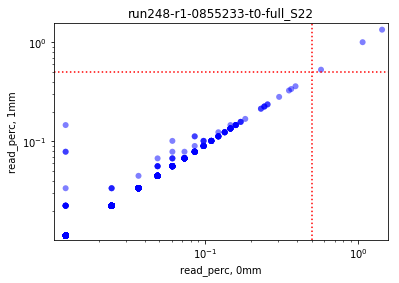

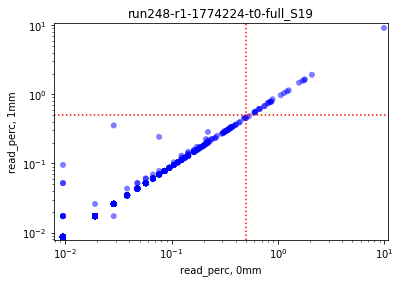

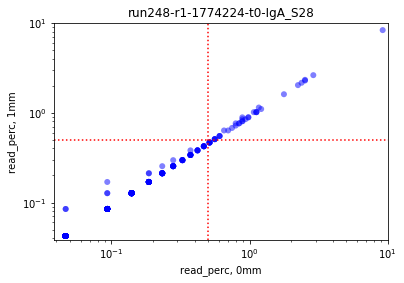

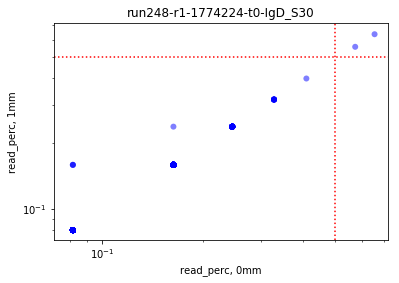

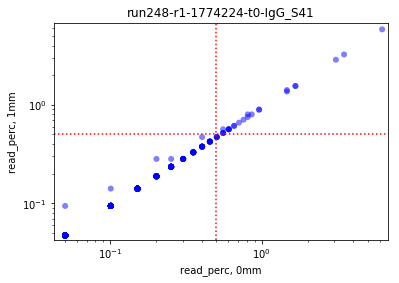

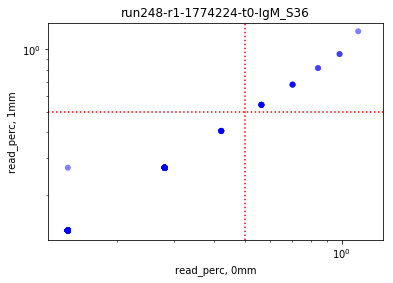

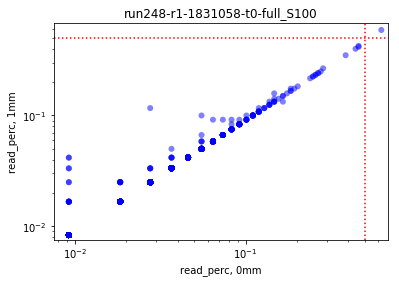

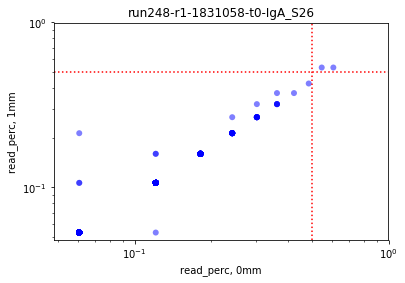

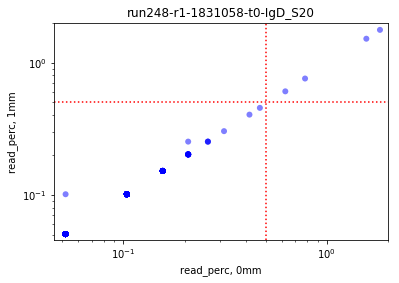

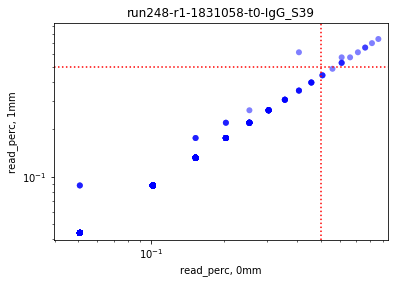

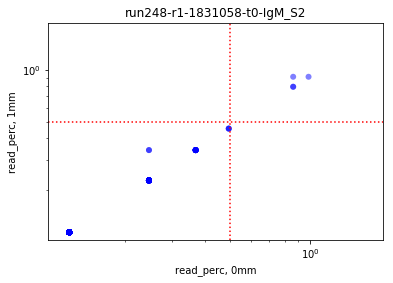

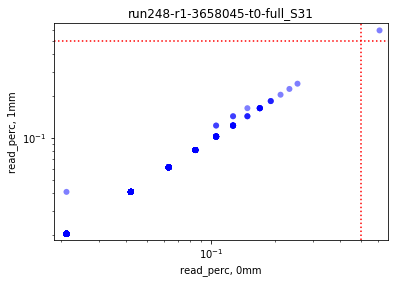

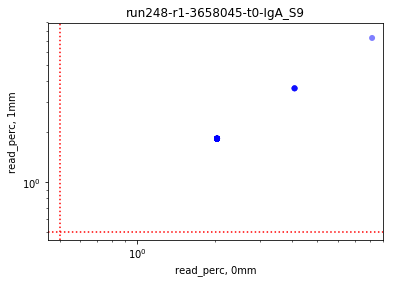

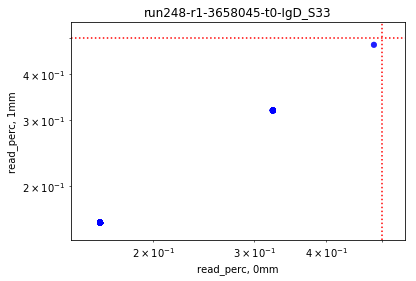

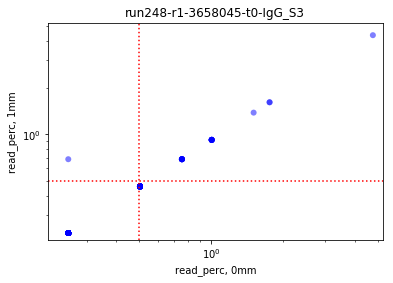

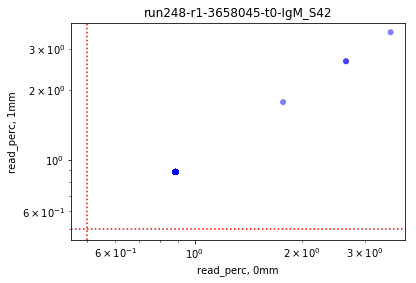

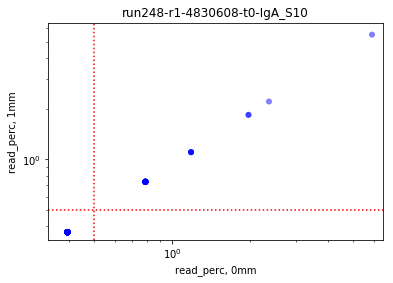

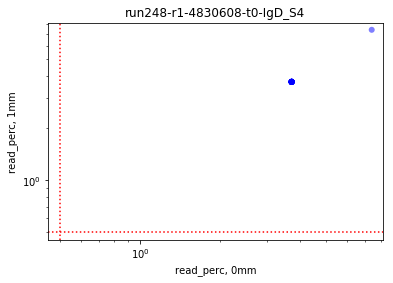

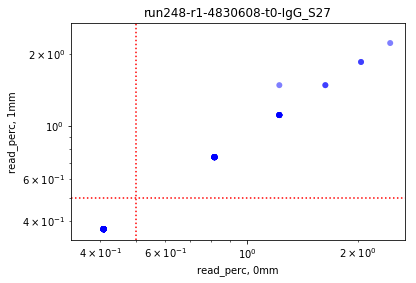

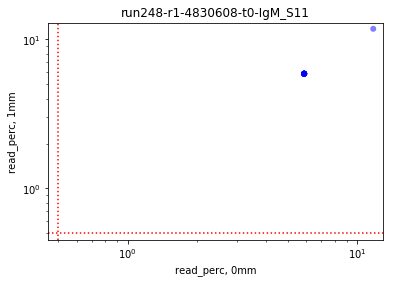

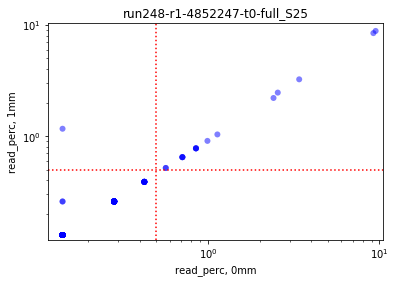

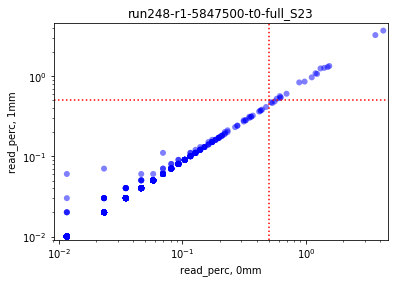

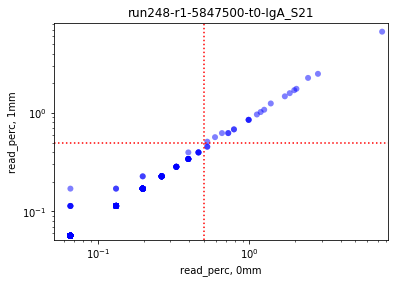

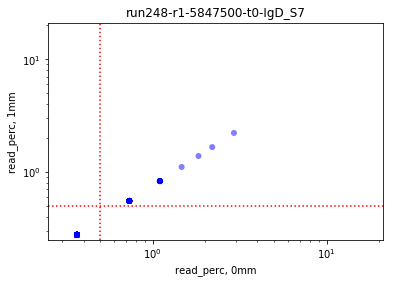

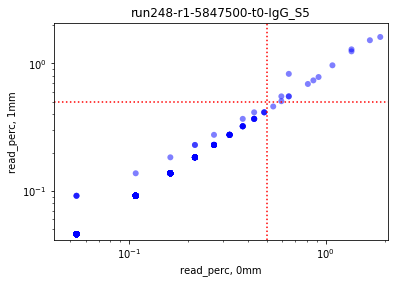

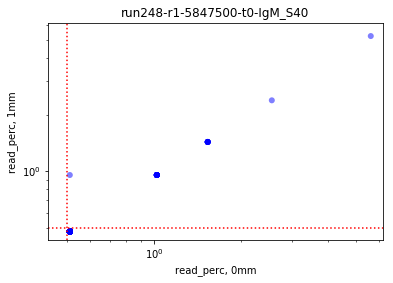

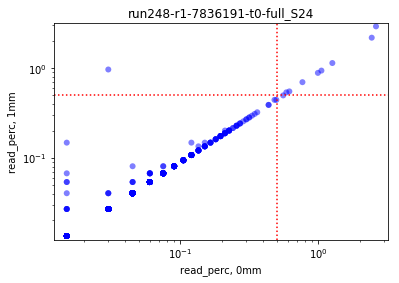

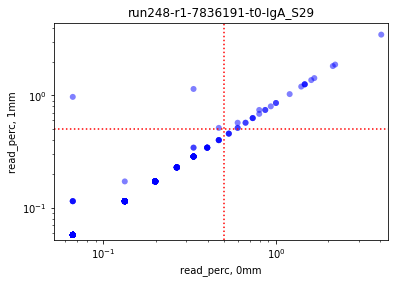

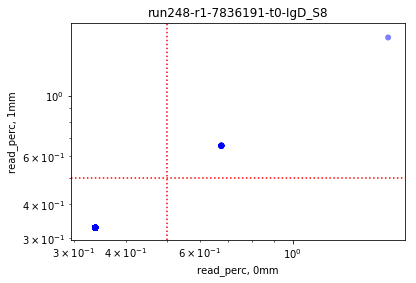

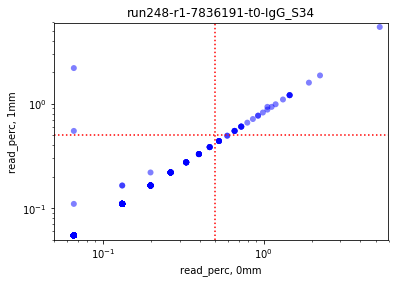

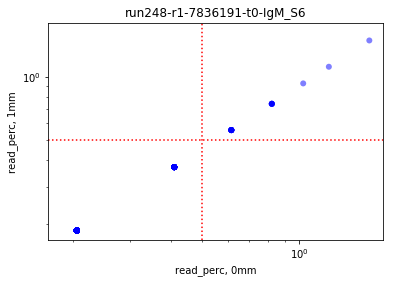

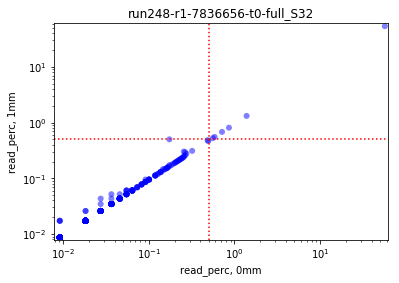

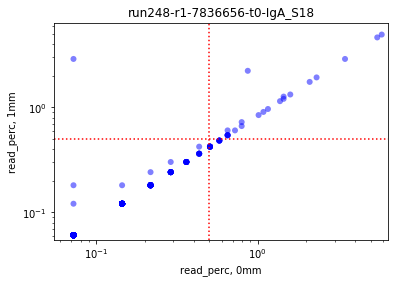

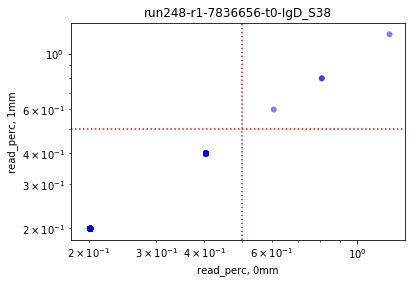

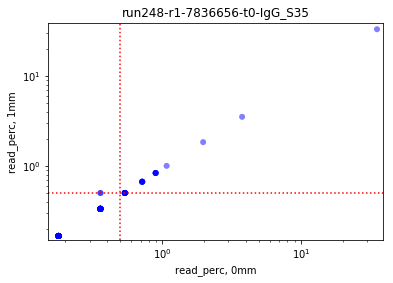

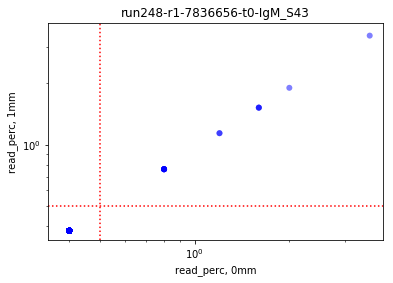

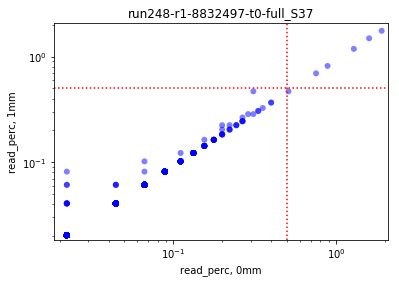

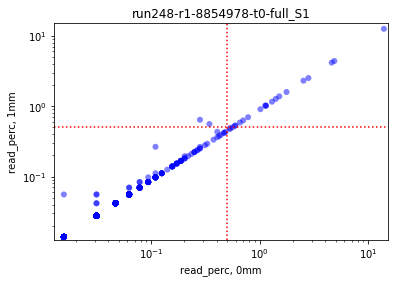

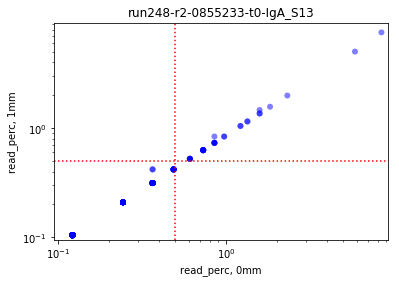

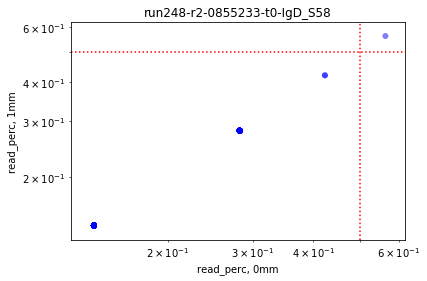

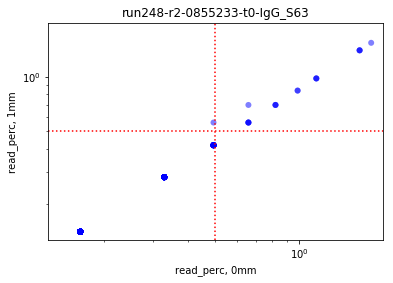

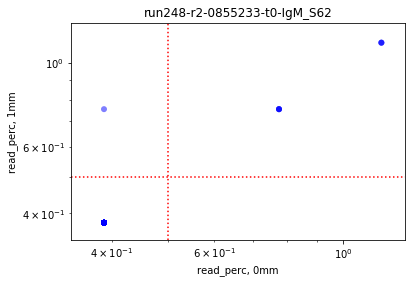

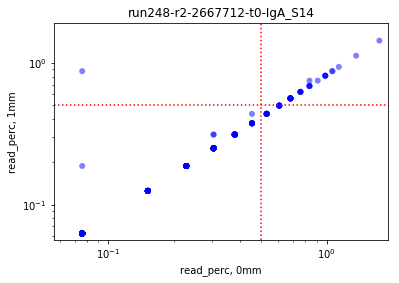

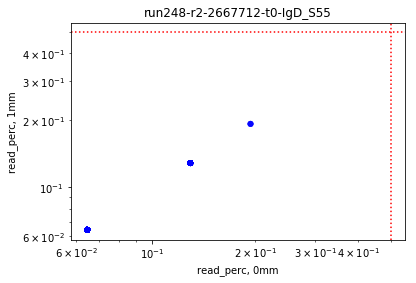

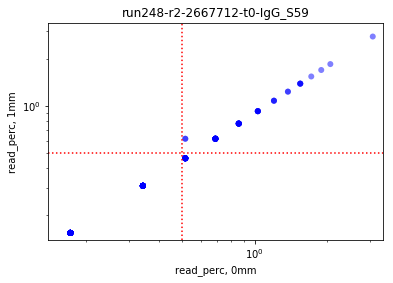

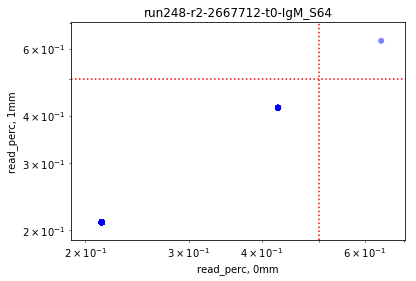

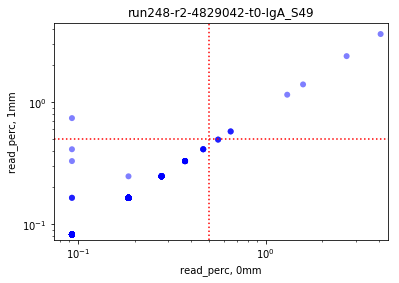

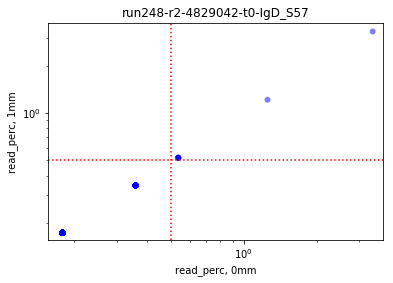

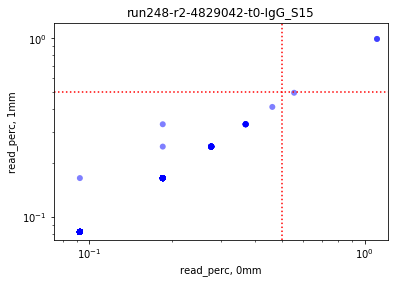

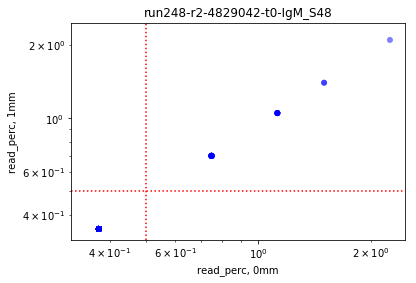

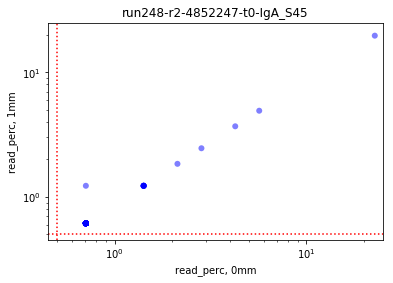

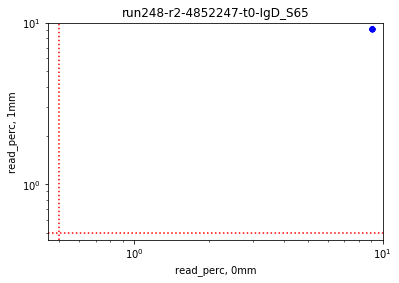

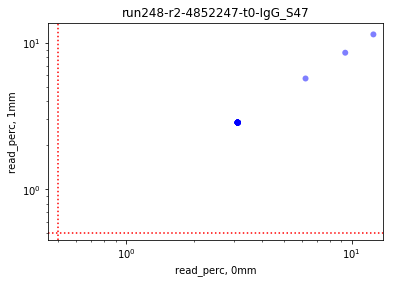

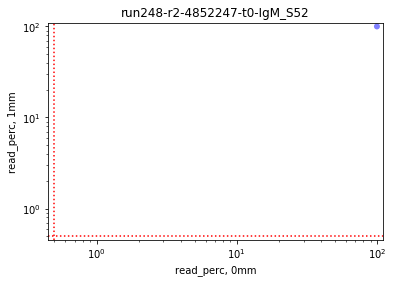

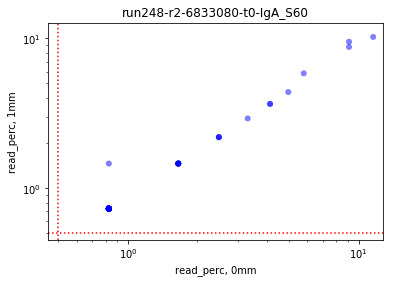

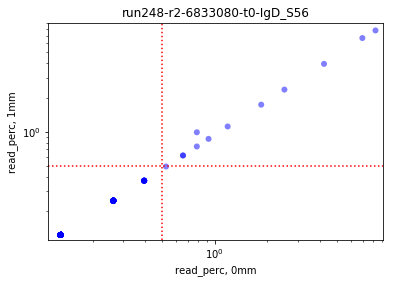

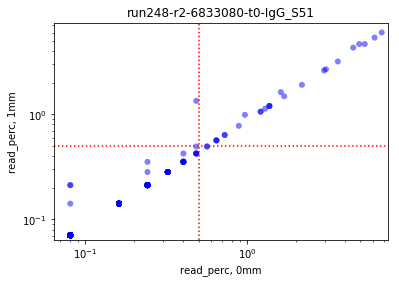

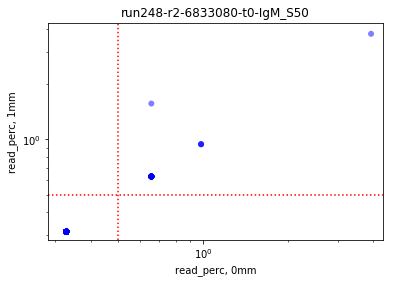

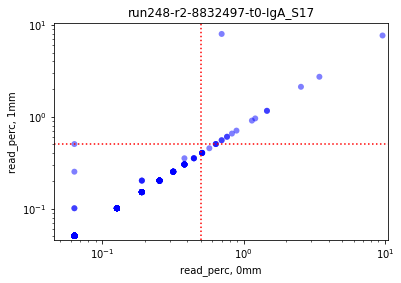

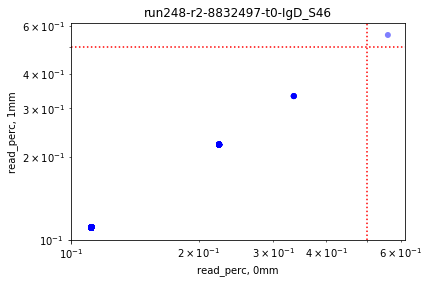

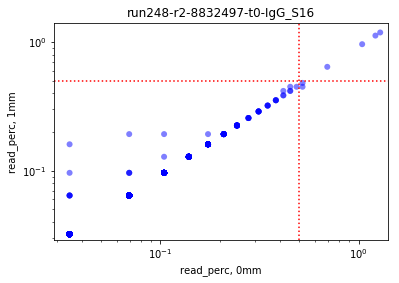

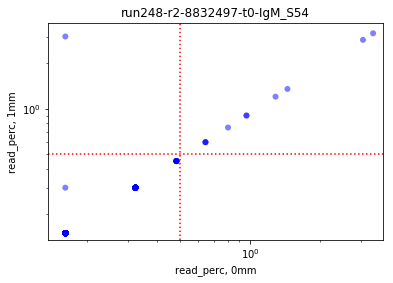

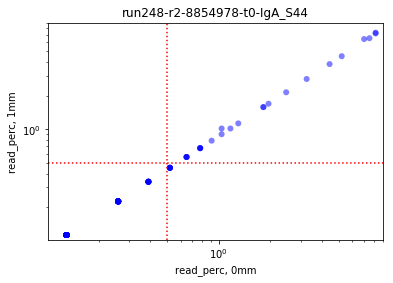

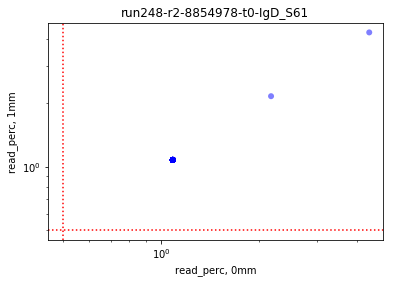

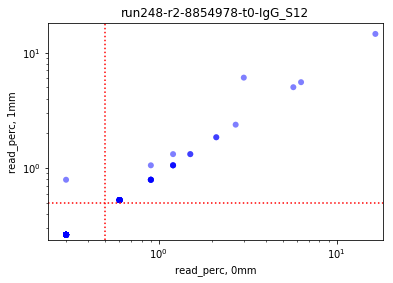

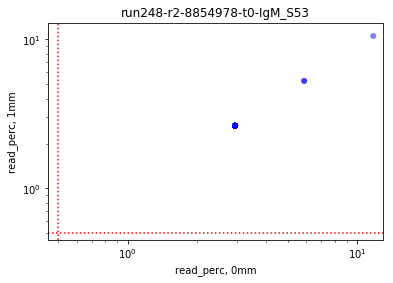

In [8]:
# Using V, J, CDR3peptide as a definition for a clone
for s in samples:
    df_x = df_0mm[df_0mm["Sample"] == s]
    df_y = df_1mm[df_1mm["Sample"] == s]
    df_xy = pd.merge(df_x, df_y, how="outer", left_on=['V_sub', 'J_sub', 'cdr3pep'], right_on=['V_sub', 'J_sub', 'cdr3pep'])
    df_xy['read_perc_x'].fillna(0.5/sum(df_xy['freq_x']))
    df_xy['read_perc_y'].fillna(0.5/sum(df_xy['freq_y']))
    makeScatter(df_xy['read_perc_x'], df_xy['read_perc_y'], s)